# Introduction to Efficient Scientific Computing with Python
## *Or:  Just let NumPy handle it*
### Alex Deich
### adeich2@illinois.edu

In [105]:
# problem 1:
# A star is falling into a black hole.
# Write a program which calculates how
# the star's spectrum changes as it falls.
import numpy as np

In [106]:
def redshift(lambda_e, R_e):
    """ this function returns the wavelength by measured by an observer at infinity.
    Inputs:
    lambda_e: the wavelength in the rest frame of the emitter
    R_e: the distance from the emitter to the black hole, in units of R_s
    """
    gamma = np.sqrt(1 - (1 / R_e))
    return(lambda_e / gamma)

In [107]:
def falling_star(start_lambda,
                 end_lambda,
                 dlambda,
                 start_rad,
                 end_rad,
                 dr):
    spectral_history = []
    
    N_rad = int(np.abs((end_rad - start_rad) / dr))
    N_lambda = int(np.abs((end_lambda - start_lambda) / dlambda))
    radius = start_rad
    
    for r in range(N_rad):  
        spectrum = []
        lambda_r = start_lambda
        
        for l in range(N_lambda):
            spectrum.append(redshift(lambda_r, radius))
            lambda_r += dlambda
            
        spectral_history.append(spectrum)
        radius += dr
        
    return(spectral_history)

In [125]:
spectra = falling_star(start_lambda = 0.25,
                        end_lambda = 3,
                        dlambda = 0.01,
                        start_rad = 2,
                        end_rad = 10,
                        dr = 0.01)

Text(0, 0.5, '$\\lambda_{\\infty}$')

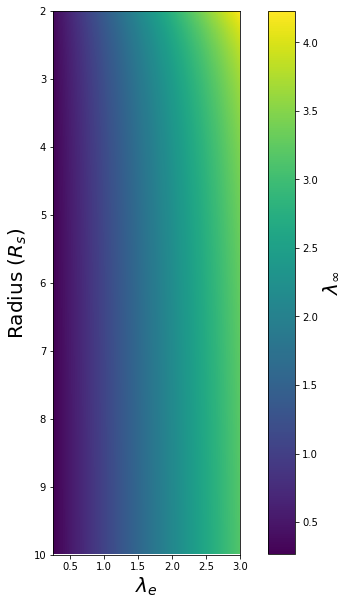

In [130]:
fig = plt.figure(figsize=(10,10))
plt.imshow(spectra, extent = (0.25,3,10,2))
plt.xlabel(r'$\lambda_e$', size=20)
plt.ylabel(r'Radius ($R_s$)', size=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$\lambda_{\infty}$', size=20)

In [109]:
%timeit falling_star(start_lambda = 0.25, end_lambda = 3, dlambda = 0.01, start_rad = 10, end_rad = 2, dr = 0.01)

268 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [110]:
import os
%timeit os.system('./falling_star.o 0.25 3 0.01 10 2 0.01')

6.31 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Numpy Arrays

In [8]:
my_list = []
my_list.append(5)
my_list.append("blah")
print(my_list)

[5, 'blah']


In [9]:
arr1 = np.arange(0, 3, 0.04)

In [10]:
arr1

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16,
       2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 ,
       2.64, 2.68, 2.72, 2.76, 2.8 , 2.84, 2.88, 2.92, 2.96])

In [11]:
arr2 = np.arange(2, 5, 0.04)

In [12]:
zeros = np.zeros((2, 10))

In [13]:
zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [134]:
def falling_star(start_lambda,
                 end_lambda,
                 dlambda,
                 start_rad,
                 end_rad,
                 dr):
    
    rads = np.arange(start_rad, end_rad, dr)
    lams = np.arange(start_lambda, end_lambda, dlambda)
    N_rad = len(rads)
    N_lams = len(lams)
    
    spectral_history = np.zeros((N_rad, N_lams))
    for i in range(N_rad):
        radius = rads[i]
        spectral_history[i] = redshift(lams, radius)
        
    return(spectral_history)

In [15]:
%timeit falling_star(start_lambda = 0.25, end_lambda = 3, dlambda = 0.01, start_rad = 2, end_rad = 10, dr = 0.01)

3.91 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [135]:
x = falling_star(start_lambda = 0.25, end_lambda = 3, dlambda = 0.01, start_rad = 2, end_rad = 10, dr = 0.01)

Text(0, 0.5, '$\\lambda_{\\infty}$')

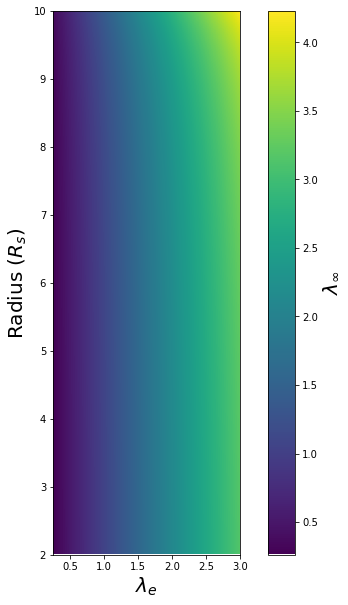

In [138]:
fig = plt.figure(figsize=(10,10))
plt.imshow(x, extent = (0.25,3,2,10))
plt.xlabel(r'$\lambda_e$', size=20)
plt.ylabel(r'Radius ($R_s$)', size=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$\lambda_{\infty}$', size=20)

## Taking a derivative

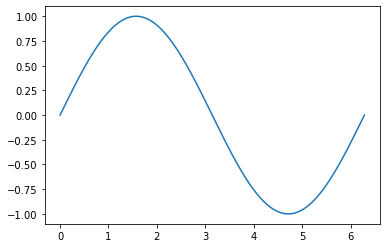

In [139]:
x = np.linspace(0, 2 * np.pi, 1000)
data = np.sin(x)
plt.plot(x, data)

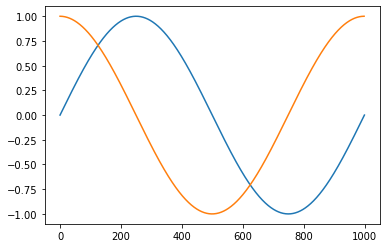

In [142]:
dx = np.diff(x)
d_data = np.diff(data) / dx
plt.plot(data)
plt.plot(d_data)

## Putting data in NumPy arrays

In [20]:
pylist = [0]
pylist.append(5)
print(pylist)

[0, 5]


In [21]:
nparr = np.array([0.])
nparr = np.append(nparr, 5)
print(nparr)

[0. 5.]


In [22]:
nparr = np.zeros(2)
nparr[1] = 5
print(nparr)

[0. 5.]


In [159]:
def pylist_append(N_append):
    pylist = []
    for i in range(N_append):
        pylist.append(i * i)
    return(pylist)

def np_append(N_append):
    nparr = np.array([])
    for i in range(N_append):
        np.append(nparr, i * i)
    return(nparr)

def np_vector(N_append):
    data = np.arange(N_append)
    return(data * data)

In [144]:
%timeit pylist_append(1000000)

118 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [145]:
%timeit np_append(1000000)

4.98 s ± 251 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [146]:
%timeit np_insert(1000000)

2.55 ms ± 310 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


()

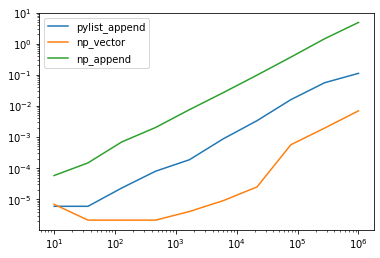

In [176]:
import time

def running_avg(arr, step):
    Nsteps = int(len(arr) / step)
    i = 0
    retarr = np.zeros_like(arr)
    for i in range(len(arr)):
        retarr[i] = np.mean(arr[i:int((i+step)%len(arr))])
    return(retarr)

def compare_funcs(funcs, arg_range):
    for func in funcs:
        times = []
        for arg in arg_range:
            t0 = time.time()
            func(int(arg))
            times.append(time.time() - t0)
        times = np.array(times)
        
        plt.loglog(arg_range, times, label = func.__name__)
    
    plt.legend()
    return()

compare_funcs([pylist_append, np_vector, np_append], 10**(np.linspace(1,6,10)))

## Array indexing

In [28]:
arr = np.arange(0,100)
arr[5]

5

In [29]:
arr[-5:-34:-2]

array([95, 93, 91, 89, 87, 85, 83, 81, 79, 77, 75, 73, 71, 69, 67])

In [30]:
bigdata = np.random.random(size=(int(1e9)))

In [31]:
np.mean(bigdata[::1000])

0.4995630438904291

# Practice problems

*None of these requires a Python `for` loop*

1) Using only the functions `np.diff`, `np.abs`, and `np.where`*, take the second derivarive of the function
$f(x) = e^{-(x-2)^2} + \sqrt{x+1/2}$ on the domain $x \in [0, 5]$, find the extremal points, and characterize them as either minima or maxima (there are no saddle points for this function).

*`np.abs` takes the absolute value, and `np.where` returns the locations of values in an array matching a condition.  Read the [documentaion](https://numpy.org/doc/stable/reference/generated/numpy.where.html) for more.

2) Read the [documentation on the function `np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) and use it to remove the remaining Python `for` loop in the function `falling_star`.

3) Make a gigantic dataset of at least $10^9$ data points composed of a right-side-up Gaussian and an upside-down Gaussian, centered at $x=2$ and $x=6$, respectively (so the functional form would be $f(x) = e^{-(x-2)^2} - e^{-(x-6)^2}$).  Do the following:

 > a) Plot it.  You'll need to reduce the size with array slicing in order to make matplotlib plot it in a reasonable amount of time.
 >
 > b) Using only the function `np.mean`, find the average values for the whole dataset, then just the first half, and then  just the second half.

## Practice problem solutions
### Problem 1

In [118]:
# first, get some data
x = np.linspace(0, 5, 1000000)
data = np.exp(-(x - 2)**2) + np.sqrt(x+0.5)

# take the derivative
dx = np.mean(np.diff(x))
ddata = np.diff(data) / dx

# the flat spots in the function correspond to the zeros of the derivative,
# so we want the x-values corresponding to very small values of `ddata`
min_ddata = np.where(np.abs(ddata) < 0.00001)

# This will return *all* points which match the above condition,
# so we'll see two groups which cluster around the minima, and determine them by eye.
# In practice, there are yet more NumPy functions available which can automatically
# identify these clusters pretty easily (have a look at np.histogram for example),
# but I wanted to keep this simple.

print("Extremal points occur at:", x[min_ddata])

Extremal points occur at: [2.15719716 2.15720216 3.6007136  3.6007186  3.6007236  3.6007286
 3.6007336  3.6007386  3.6007436 ]


In [119]:
# So, pretty clearly, there are two minima: one at around 2.1571 and one at 3.6006.

# now find the second derivative
dddata = np.diff(ddata) / dx

# and look at the values of the second derivative at the identified zeros
dddata[min_ddata]

array([-1.91245748, -1.91245748,  0.6061628 ,  0.6061095 ,  0.60612727,
        0.60612727,  0.60607398,  0.60612727,  0.60612727])

Text(0.5, 1.0, 'Nice.')

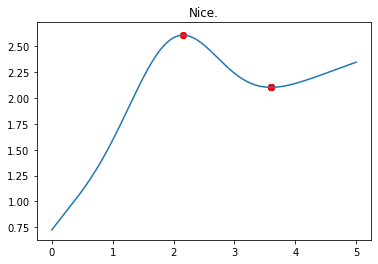

In [120]:
# Evidently, the first is a maximum and the second is a minimum.
# Let's plot it to check:

plt.plot(x, data)
plt.scatter(x[min_ddata], data[min_ddata], c='r')
plt.title('Nice.')

### Problem 2

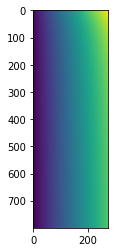

In [104]:
def falling_star(start_lambda,
                 end_lambda,
                 dlambda,
                 start_rad,
                 end_rad,
                 dr):
    
    rads = np.arange(start_rad, end_rad, dr)
    lams = np.arange(start_lambda, end_lambda, dlambda)
    
    # np.meshgrid returns two arrays, each sized to fully span the other one.
    # It is an incredibly helpful function to go through all possible combinations
    # of two or more arrays
    L, R = np.meshgrid(lams, rads)
    spectral_history = redshift(L, R)
        
    return(spectral_history)

# do we get the same plot as before?
plt.imshow(falling_star(start_lambda = 0.25, end_lambda = 3, dlambda = 0.01, start_rad = 2, end_rad = 10, dr = 0.01))

### Problem 3

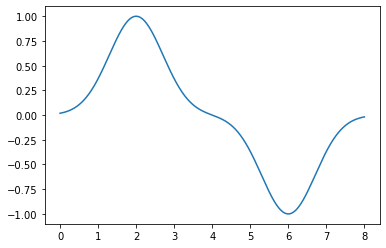

In [102]:
# make some data
x = np.linspace(0, 8, int(1e9))
data = np.exp(-(x-2)**2) - np.exp(-(x-6)**2)

# plot it for a sanity check
step = 10000
plt.plot(x[::step], data[::step])

In [103]:
total_avg = np.mean(data)
first_half_avg = np.mean(data[:int(len(data)/2)])
second_half_avg = np.mean(data[int(len(data)/2):])
print(total_avg, first_half_avg, second_half_avg)

8.812858851570126e-16 0.44000431128693723 -0.44000431128694095
